### 1. What is Detectron2?
Detectron2 is a PyTorch-based modular object detection library developed by the Facebook AI Research team. It provides a large set of trained models available for download. Detectron2 includes high-quality implementations of state-of-the-art object detection algorithms, including [DensePose](http://densepose.org/), [panoptic feature pyramid networks](https://ai.facebook.com/blog/improving-scene-understanding-through-panoptic-segmentation/), and numerous variants of the pioneering [Mask R-CNN](https://research.fb.com/publications/mask-r-cnn/) model family.
<img src="https://user-images.githubusercontent.com/1381301/66535560-d3422200-eace-11e9-9123-5535d469db19.png" alt="Drawing" style="width: 600px;"/>

### 2. Installation
Installing detectron2 is fairly simple as opposed to other object detection frameworks like the Tensorflow Object Detection API.
We will be installing torch, torchvision, cocoapi, and detectron2.

In [1]:
!pip install -q -U torch torchvision -f https://download.pytorch.org/whl/torch_stable.html
!pip install -q -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 GB 790.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-scj2s3rp
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-scj2s3rp
  Resolved https://github.com/facebookresearch/detectron2.git to commit a2e43eab54d28ffbd59f5e9b4e3193b82faeb70f
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.6 MB/s eta 0:00:00
 

### 3. Dependencies
We are going to need the detectron2 for configuring and building the model and for viusalizing the bounding boxes. For reading and plotting images, we will be using matplotlib.

In [2]:
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2 import model_zoo

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline

### 4. Model Definition

We will be using a pre-trained model for now. Using a pretrained model is super easy in Detectron. We only need to load in and modify some configs. Then we will load in the weights of a pretrained model. Using the configs and pretrained weights, we will create DefaultPredictor to make predictions.

We will be using a Faster R-CNN model. It uses a ResNet+FPN backbone with standard conv and FC heads for mask and box prediction, respectively. This model obtains the best speed/accuracy tradeoff. You can have a look at some of the other pretrained models available at [Model Zoo](https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md).

In [3]:
# Loading the default config
cfg = get_cfg()


# Merging config from a YAML file
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))


# Downloading and loading pretrained weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")


# Changing some other configs
cfg.MODEL.DEVICE = 'cpu' # setting device to CPU as no training is required as per now
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # setting threshold for this model


# Defining the Predictor
predictor = DefaultPredictor(cfg)

model_final_a3ec72.pkl: 254MB [00:01, 133MB/s]                           


### 5. Utility Functions

We are going to define some utility functions for showing the image and the predicted labels.****

In [4]:
def show_image(im, height=16, width=10):
    plt.figure(figsize=(16,10))
    plt.imshow(im)
    plt.axis("off")
    plt.show()

In [5]:
def get_predicted_labels(classes, scores, class_names):

    labels = None
    if classes is not None and class_names is not None and len(class_names) > 1:
        labels = [class_names[i] for i in classes]
        labels = ["{} {:.0f}%".format(l, s * 100) for l, s in zip(labels, scores)]
        return labels
    else:
        return "No object identified"

### 6. Load Image
We will be downloading an image from [Unsplash](http://unsplash.com) and performing object detection on it. You may provide any other image url for object detection.

--2023-07-23 12:41:04--  https://cdn-images-1.medium.com/max/872/1*EYFejGUjvjPcc4PZTwoufw.jpeg
Resolving cdn-images-1.medium.com (cdn-images-1.medium.com)... 162.159.152.4, 162.159.153.4, 2606:4700:7::a29f:9904, ...
Connecting to cdn-images-1.medium.com (cdn-images-1.medium.com)|162.159.152.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /v2/resize:fit:872/1*EYFejGUjvjPcc4PZTwoufw.jpeg [following]
--2023-07-23 12:41:04--  https://cdn-images-1.medium.com/v2/resize:fit:872/1*EYFejGUjvjPcc4PZTwoufw.jpeg
Reusing existing connection to cdn-images-1.medium.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 113787 (111K) [image/jpeg]
Saving to: ‘input_image.jpg’

input_image.jpg     100%[===================>] 111.12K  --.-KB/s    in 0.008s  

2023-07-23 12:41:04 (13.9 MB/s) - ‘input_image.jpg’ saved [113787/113787]



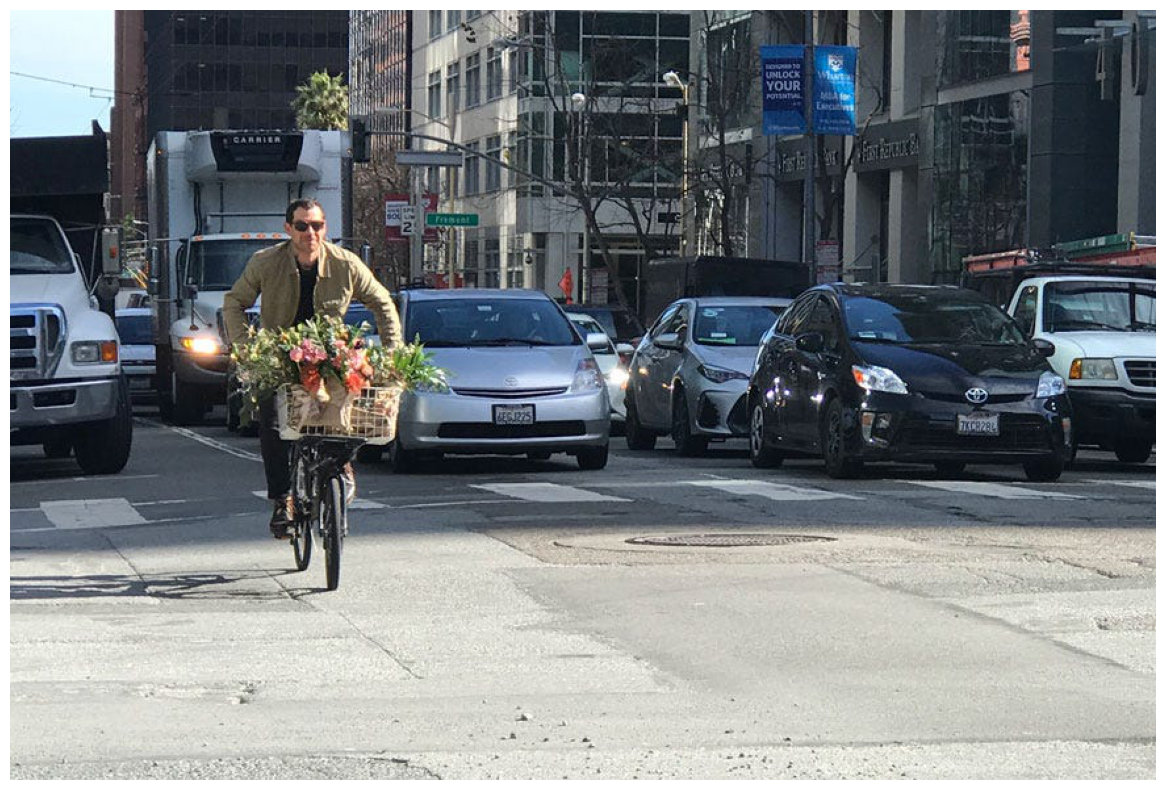

In [6]:
# Download image as input_image.jpg
# !wget https://images.unsplash.com/photo-1585574123552-aac232a58514 -O input_image.jpg

!wget https://cdn-images-1.medium.com/max/872/1*EYFejGUjvjPcc4PZTwoufw.jpeg -O input_image.jpg

# Read image
im = mpimg.imread("input_image.jpg")

# Show image
show_image(im)

### 7. Prediction

Finally, we will predict the objects present in the above image using the predictor we defined earlier. Our output will be a list of predicted class labels along with the prediction score and an image with bounding box drawn over each object.

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Predicted Objects: ['car 100%', 'person 99%', 'car 99%', 'car 99%', 'car 91%', 'bicycle 90%', 'truck 89%', 'car 80%', 'truck 72%', 'bicycle 71%', 'truck 66%', 'potted plant 64%', 'truck 61%', 'potted plant 57%', 'car 52%']


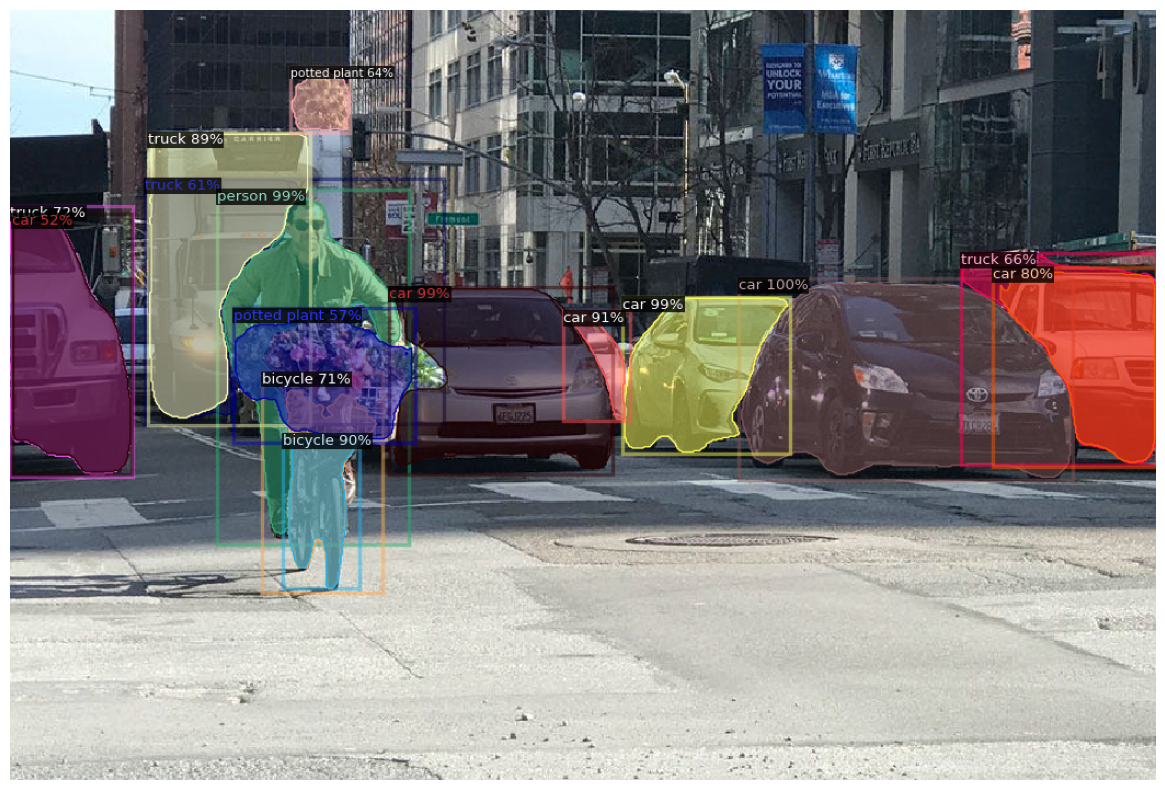

In [7]:
# Predicting image
outputs = predictor(im)


# Extracting other data from the predicted image
scores = outputs["instances"].scores
classes = outputs["instances"].pred_classes
class_names = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes


# Obtaining a list of predicted class labels using the utility function created earlier
predicted_labels = get_predicted_labels(classes, scores, class_names)


# Creating the Visualizer for visualizing the bounding boxes
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
output_im = v.get_image()[:, :, ::-1] # image with bounding box and lables defined


# Displaying the output
print(f"Predicted Objects: {predicted_labels}")
show_image(output_im, outputs)

--2023-07-23 12:43:58--  https://upload.wikimedia.org/wikipedia/commons/3/3f/Galle_Road_at_Sunset_-_Mt._Lavinia_-_Colombo_-_Sri_Lanka_%2814003898522%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3912607 (3.7M) [image/jpeg]
Saving to: ‘input_image.jpg’

input_image.jpg     100%[===================>]   3.73M  10.2MB/s    in 0.4s    

2023-07-23 12:43:59 (10.2 MB/s) - ‘input_image.jpg’ saved [3912607/3912607]



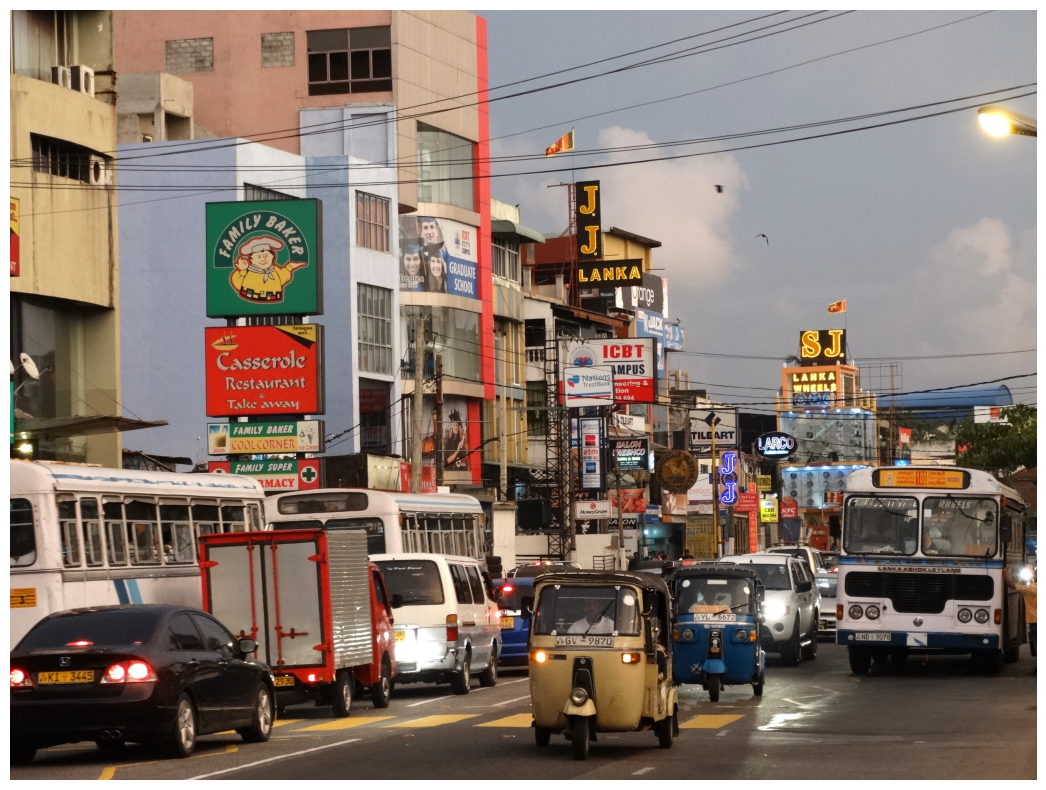

In [10]:

!wget https://upload.wikimedia.org/wikipedia/commons/3/3f/Galle_Road_at_Sunset_-_Mt._Lavinia_-_Colombo_-_Sri_Lanka_%2814003898522%29.jpg -O input_image.jpg

# Read image
im = mpimg.imread("input_image.jpg")

# Show image
show_image(im)

Predicted Objects: ['car 99%', 'bus 99%', 'car 99%', 'bus 94%', 'car 87%', 'car 85%', 'car 84%', 'car 81%', 'bird 80%', 'car 77%', 'truck 76%', 'truck 72%', 'bus 67%', 'bus 62%', 'bus 57%', 'person 57%', 'car 51%']


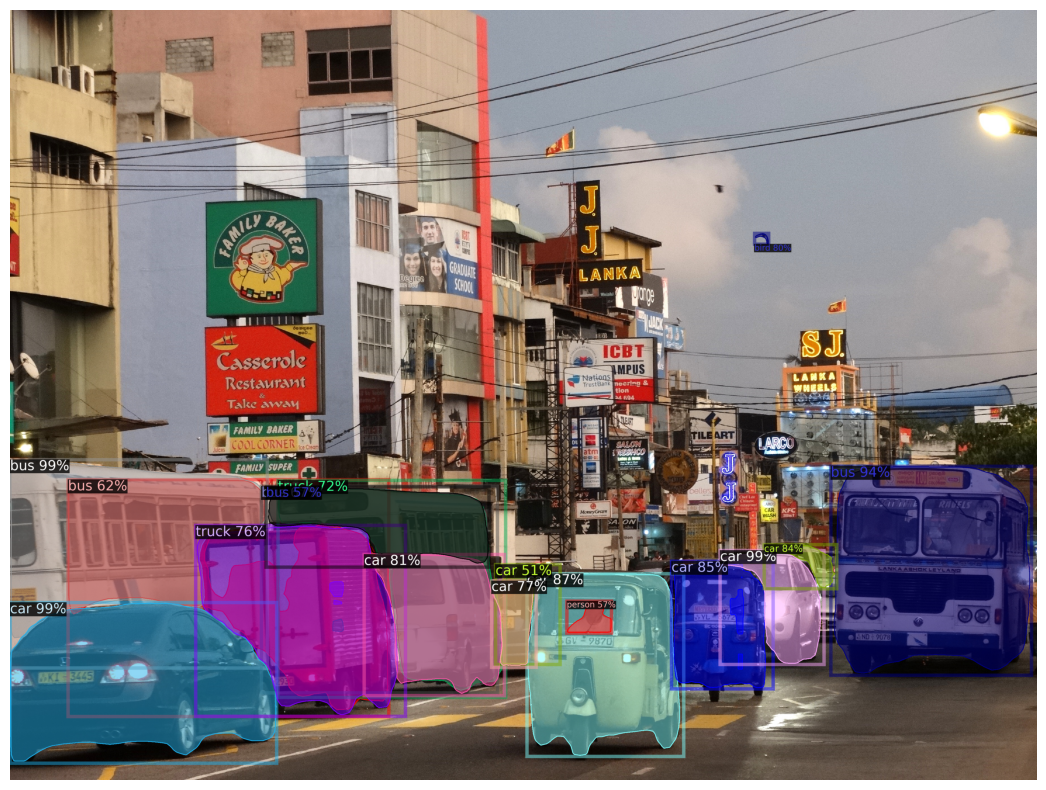

In [11]:
# Predicting image
outputs = predictor(im)


# Extracting other data from the predicted image
scores = outputs["instances"].scores
classes = outputs["instances"].pred_classes
class_names = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes


# Obtaining a list of predicted class labels using the utility function created earlier
predicted_labels = get_predicted_labels(classes, scores, class_names)


# Creating the Visualizer for visualizing the bounding boxes
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
output_im = v.get_image()[:, :, ::-1] # image with bounding box and lables defined


# Displaying the output
print(f"Predicted Objects: {predicted_labels}")
show_image(output_im, outputs)